In [1]:
import pybbn

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [3]:
class PLinear(nn.Linear):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.weight_std = nn.Parameter(torch.empty(self.weight.shape))
        nn.init.kaiming_uniform_(self.weight_std, a=math.sqrt(5))

    def forward(self, x):
        return F.linear(
            x, 
            self.weight + self.weight_std * torch.randn(self.weight_std.shape), 
            self.bias
        )

In [7]:
def generator(mean, std):
    return torch.randn(std.shape) * std + mean

gauss_net = nn.Sequential(
    PLinear(2, 200),
    nn.ReLU(),
    PLinear(200, 1)
)

gauss_net(torch.Tensor([[1, 2], [3, 4]]))

tensor([[-0.3746],
        [-0.3326]], grad_fn=<AddmmBackward>)

tensor(1.9931)


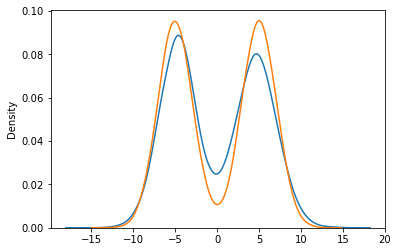

tensor(1.5495)


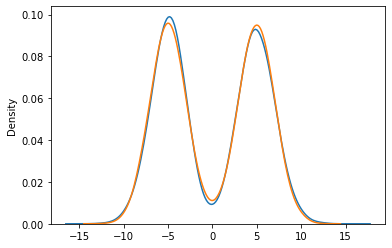

tensor(1.5380)


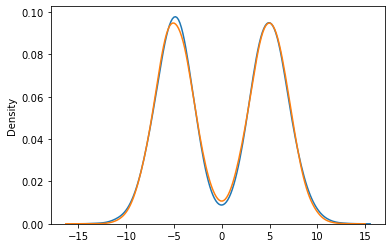

tensor(1.5428)


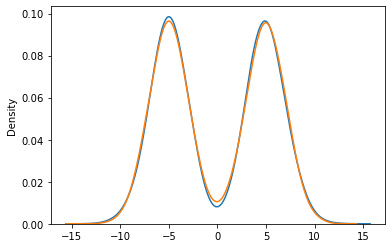

tensor(1.5389)


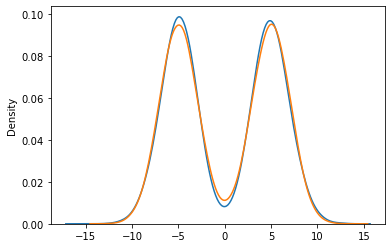

tensor(1.5734)


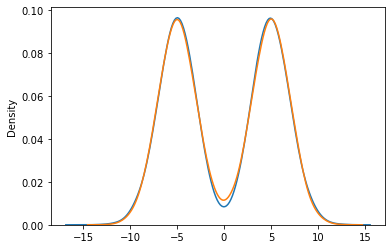

tensor(1.5552)


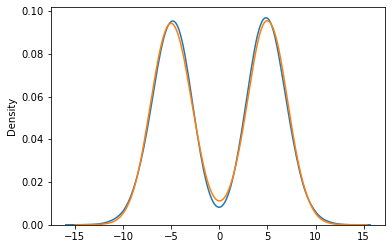

tensor(1.5832)


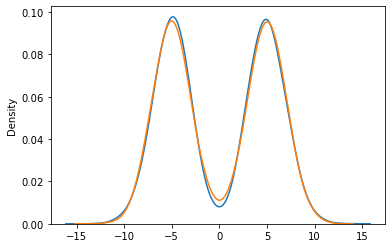

tensor(1.5305)


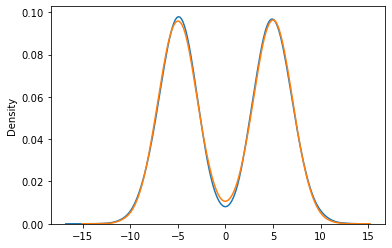

tensor(1.5602)


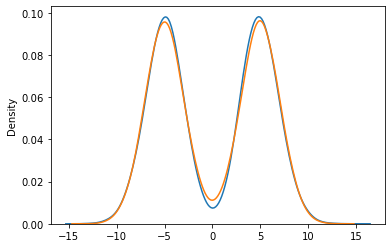

tensor(1.5528)


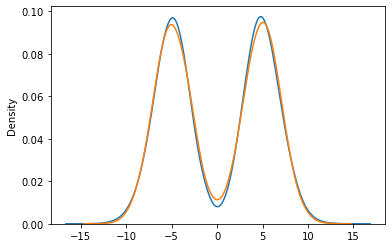

tensor(1.5536)


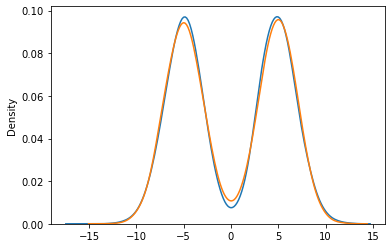

tensor(1.5462)


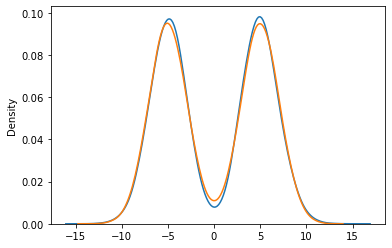

tensor(1.5274)


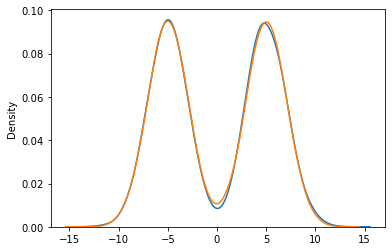

tensor(1.5449)


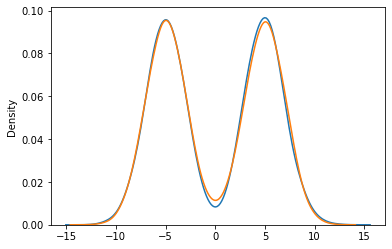

tensor(1.5624)


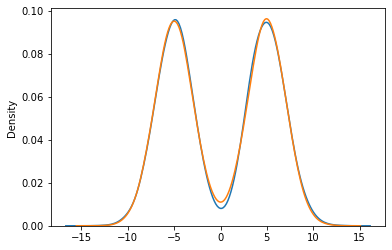

tensor(1.5414)


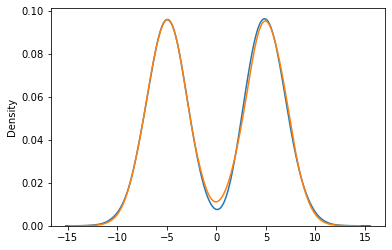

tensor(1.5433)


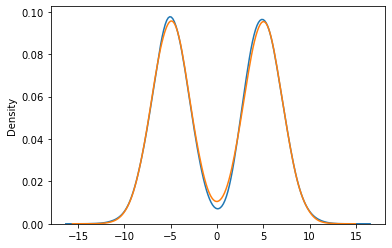

tensor(1.5539)


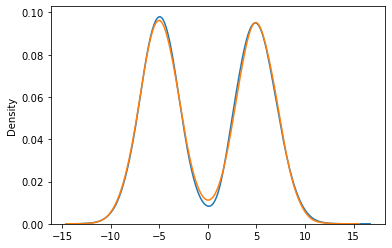

tensor(1.5707)


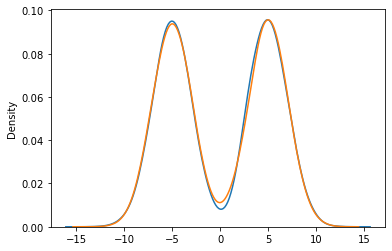

In [8]:
gauss_net = nn.Sequential(
    PLinear(2, 20),
    nn.ReLU(),
    PLinear(20, 1)
)

batch_size = 1
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(gauss_net.parameters(), lr=1e-6, momentum=0.9)

loss_avg = 0
examples = []
all_labels = []

running_df = pandas
for i in range(1000000):
    
    mean = 5 if i % 2 == 0 else -5
    std = 2
    labels = torch.randn(batch_size) * std + mean
    
    optimizer.zero_grad()
    
    inputs = torch.ones(batch_size, 2) # no inputs / fake inputs
    
    # Take minimum of N losses
    losses = []
    labels = generator(means, stds).view(-1, 1)
    for j in range(4):
        preds = gauss_net(inputs)
        losses.append(loss_fn(preds, labels))
    losses = torch.stack(losses, dim=-1)
    loss, indices = torch.min(losses, dim=-1)
    

    loss_avg += loss.detach()
    loss.backward()
    optimizer.step()
    examples.append(preds.item())
    all_labels.append(labels.item())
    if i % 50000 == 49999:
        print(loss_avg / 50000)
        loss_avg = 0
        sns.kdeplot(x=examples)   
        sns.kdeplot(x=all_labels)   
        plt.show()
        examples = []
        all_labels = []

In [71]:
ins = torch.ones(100, 2) * torch.tensor([[0, 1]])
gauss_net(ins)

tensor([[4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4.2924],
        [4

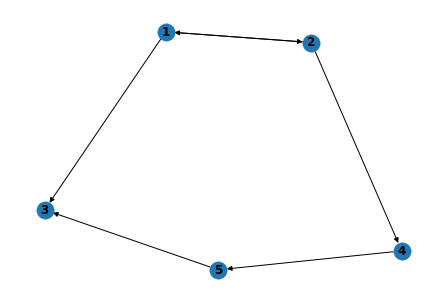

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

DG = nx.DiGraph()
DG.add_edge(2, 1)   # adds the nodes in order 2, 1
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)
DG.add_edge(4, 5)
DG.add_edge(5, 3)
nx.draw(DG, with_labels=True, font_weight='bold')

plt.show()

In [3]:
from pybbn.graph.dag import Bbn
from pybbn.graph.edge import Edge, EdgeType
from pybbn.graph.jointree import EvidenceBuilder
from pybbn.graph.node import BbnNode
from pybbn.graph.variable import Variable
from pybbn.pptc.inferencecontroller import InferenceController

# create the nodes
a = BbnNode(Variable(0, 'a', ['on', 'off']), [0.5, 0.5])
b = BbnNode(Variable(1, 'b', ['on', 'off']), [0.5, 0.5, 0.4, 0.6])
c = BbnNode(Variable(2, 'c', ['on', 'off']), [0.7, 0.3, 0.2, 0.8])
d = BbnNode(Variable(3, 'd', ['on', 'off']), [0.9, 0.1, 0.5, 0.5])
e = BbnNode(Variable(4, 'e', ['on', 'off']), [0.3, 0.7, 0.6, 0.4])
f = BbnNode(Variable(5, 'f', ['on', 'off']), [0.01, 0.99, 0.01, 0.99, 0.01, 0.99, 0.99, 0.01])
g = BbnNode(Variable(6, 'g', ['on', 'off']), [0.8, 0.2, 0.1, 0.9])
h = BbnNode(Variable(7, 'h', ['on', 'off']), [0.05, 0.95, 0.95, 0.05, 0.95, 0.05, 0.95, 0.05])

In [4]:

# create the network structure
bbn = Bbn() \
    .add_node(a) \
    .add_node(b) \
    .add_node(c) \
    .add_node(d) \
    .add_node(e) \
    .add_node(f) \
    .add_node(g) \
    .add_node(h) \
    .add_edge(Edge(a, b, EdgeType.DIRECTED)) \
    .add_edge(Edge(a, c, EdgeType.DIRECTED)) \
    .add_edge(Edge(b, d, EdgeType.DIRECTED)) \
    .add_edge(Edge(c, e, EdgeType.DIRECTED)) \
    .add_edge(Edge(d, f, EdgeType.DIRECTED)) \
    .add_edge(Edge(e, f, EdgeType.DIRECTED)) \
    .add_edge(Edge(c, g, EdgeType.DIRECTED)) \
    .add_edge(Edge(e, h, EdgeType.DIRECTED)) \
    .add_edge(Edge(g, h, EdgeType.DIRECTED))

In [7]:
bbn.to_nx_graph()

(<networkx.classes.digraph.DiGraph at 0x7fdccb5c4b80>,
 {0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h'})

In [5]:

# convert the BBN to a join tree
join_tree = InferenceController.apply(bbn)

# insert an observation evidence
ev = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name('a')) \
    .with_evidence('on', 1.0) \
    .build()
join_tree.set_observation(ev)

# print the posterior probabilities
for node, posteriors in join_tree.get_posteriors().items():
    p = ', '.join([f'{val}={prob:.5f}' for val, prob in posteriors.items()])
    print(f'{node} : {p}')

d : on=0.70000, off=0.30000
e : on=0.39000, off=0.61000
f : on=0.18934, off=0.81066
g : on=0.59000, off=0.41000
h : on=0.78260, off=0.21740
c : on=0.70000, off=0.30000
b : on=0.50000, off=0.50000
a : on=1.00000, off=0.00000


In [9]:
%matplotlib inline
from pybbn.graph.dag import BbnUtil
from pybbn.graph.jointree import EvidenceBuilder, EvidenceType
from pybbn.pptc.inferencecontroller import InferenceController
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import namedtuple

np.random.seed(37)
plt.style.use('ggplot')
Marginal = namedtuple('Marginal', 'name, s')

def potential_to_series(p):
    vals = []
    index = []

    for pe in p.entries:
        try:
            v = pe.entries.values()[0]
        except:
            v = list(pe.entries.values())[0]
        p = pe.value

        vals.append(p)
        index.append(v)

    return pd.Series(vals, index=index)

def get_marginals(join_tree):
    data = []
    for node in join_tree.get_bbn_nodes():
        name = node.variable.name
        s = potential_to_series(join_tree.get_bbn_potential(node))
        t = Marginal(name, s)
        data.append(t)
    return data

# get the pre-defined huang graph
bbn = BbnUtil.get_huang_graph()

# convert the BBN to a join tree
join_tree = InferenceController.apply(bbn)

In [10]:
import math
from ipywidgets import interact

@interact(a=[('unobserved', -1), ('off', 0), ('on', 1)])
def f(a=-1):
    n_cols = 4
    n_rows = math.ceil(len(bbn.get_nodes()) / n_cols)

    if a == -1:
        join_tree.unobserve_all()
        marginals = get_marginals(join_tree)
    else:
        v = 'on' if a == 1 else 'off'
        ev = EvidenceBuilder() \
            .with_node(join_tree.get_bbn_node_by_name('a')) \
            .with_evidence(v, 1.0) \
            .build()
        join_tree.unobserve_all()
        join_tree.set_observation(ev)
        marginals = get_marginals(join_tree)

    marginals = sorted(marginals, key=lambda tup: tup[0])

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5), sharey=True)

    for m, ax in zip(marginals, np.ravel(axes)):
        m.s.plot(kind='bar', legend=False, ax=ax)
        ax.set_title(m.name)
        ax.set_ylim([0.0, 1.0])
        ax.set_xlabel('')


interactive(children=(Dropdown(description='a', options=(('unobserved', -1), ('off', 0), ('on', 1)), value=-1)…